In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from mpl_toolkits.mplot3d import axes3d as plt3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
#%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
#sns.set_style('white')

In [2]:
def WarmUpExercise(n):
    return(np.identity(n))

In [3]:
WarmUpExercise(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#Linear Regression

In [4]:
data = np.loadtxt('ex1data1.txt',delimiter = ',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

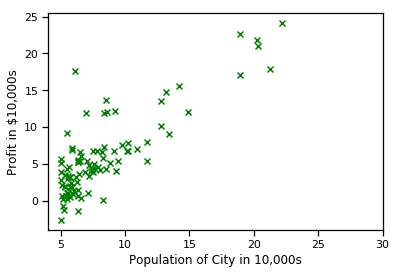

In [5]:
plt.scatter(X[:,1],y,c = 'g',marker = 'x')
plt.xlim(4,30)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [6]:
def ComputeCost(X, y, theta = [[0],[0]]):
    m = y.size
    h = X.dot(theta)
    cost = 1/2/m*np.sum(np.square(h-y))
    return(cost)

In [7]:
ComputeCost(X,y)

32.072733877455676

In [8]:
def gradientDescent(X,y, theta = [[0],[0]], alpha = 0.01, num_iter = 1500):
    m = y.size
    J_history = np.zeros(num_iter)
    
    for _ in range(num_iter):
        h = X.dot(theta)
        theta = theta - alpha/m*(X.T.dot(h-y))
        J_history[_] = ComputeCost(X,y,theta)
    
    return(theta, J_history)

Theta: [[-3.63029144  1.16636235]]


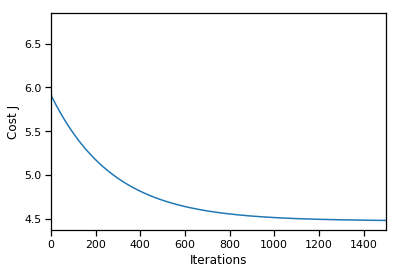

In [9]:
theta, Cost_i = gradientDescent(X,y)
print('Theta:',theta.reshape([1,2]))

plt.plot(Cost_i)
plt.xlim(0,1500);
plt.ylabel('Cost J')
plt.xlabel('Iterations');

[[1.19303364]]


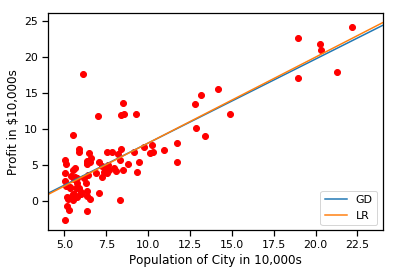

In [10]:
xx = np.array(range(1,25)).reshape([24,1])
yy = np.c_[np.ones(xx.shape[0]),xx].dot(theta)
yy

plt.scatter(X[:,1],y,c= 'r')
plt.plot(xx,yy,label = 'GD')

regr = LR()
regr.fit(X[:,1].reshape(-1,1),y);
print(regr.coef_)
plt.plot(xx, regr.intercept_+regr.coef_*xx,label = 'LR')
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [11]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


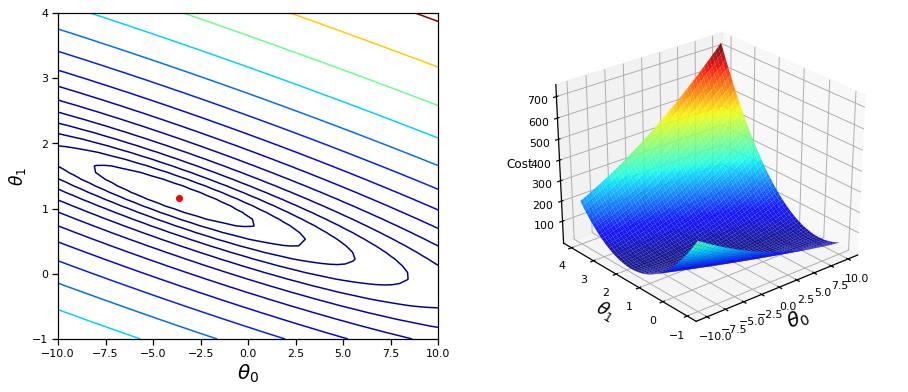

In [12]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = ComputeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(0, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.9, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=30, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=20)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
